In [29]:
import tensorflow as tf
import deeplake
import matplotlib.pyplot as plt
import os
from tensorflow import keras 
from tensorflow.keras import layers,Model 
from tensorflow.keras.datasets import mnist 
from keras.utils import plot_model 

In [27]:
# dataset_path = 'hub://activeloop/flickr30k'
dataset_path = 'hub://activeloop/mnist-train'
ds = deeplake.load(dataset_path)

\

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-train



/

hub://activeloop/mnist-train loaded successfully.



In [30]:
# Indexing
img = ds.images[0].numpy()              # Fetch the 1st image and return a NumPy array
label = ds.labels[0].numpy(aslist=True) # Fetch the 1st label and store it as a 
                                        # as a list
                              
text_labels = ds.labels[0].data()['text'] # Fetch the first labels and return them as text

# Slicing
imgs = ds.images[0:100].numpy() # Fetch 100 images and return a NumPy array
                                # The method above produces an exception if 
                                # the images are not all the same size

labels = ds.labels[0:100].numpy(aslist=True) # Fetch 100 labels and store 
                                             # them as a list of NumPy arrays

In [33]:
class custom_dense(keras.layers.Layer):
    def __init__(self, units, input_dim):
        super().__init__()
        self.w = self.add_weight(
            name='w',
            shape=(input_dim, units),
            initializer='random_normal',
            trainable=True
        )
        
        self.b = self.add_weight(
            name='b',
            shape=(units,),
            initializer='zeros',
            trainable=True
        )
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [55]:
class MyRelu(keras.layers.Layer):
    def __init__(self):
        super().__init__()
    def call(self, x):
        return tf.math.maximum(x, 0)

In [60]:
class MyModel(keras.Model):
    def __init__(self, num_classes=10):
        super().__init__()
        self.dense1 = custom_dense(64,784)
        self.dense2 = custom_dense(num_classes,64)
        self.relu = MyRelu()
        
    def call(self, x):
        x = self.relu(self.dense1(x))
        return self.dense2(x)
        
    def model(self):
        x = keras.Input(shape=(28*28))
        return Model(input_shape[x],output_shape=self.call(x))

In [63]:
fin_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [65]:
fin_model.fit(imgs, labels, batch_size=32, epochs=5, verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 100
  y sizes: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
Make sure all arrays contain the same number of samples.

In [62]:
fin_model = MyModel()
fin_model.summary() 

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

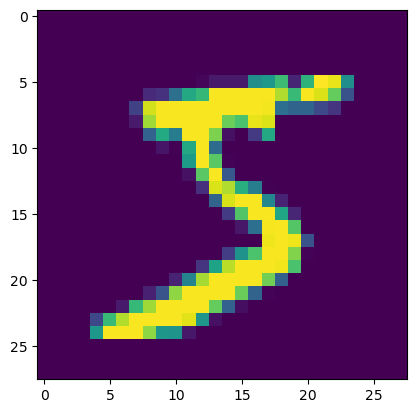

In [24]:
plt.imshow(img)

In [35]:
28*28

784